#  Task1 What are the differences between path length and clustering coefficients? 

## Packages used:
* networkx
* matplotlib
* numpy

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

## What do Erdos-Renyi Graphs look like?

How does the value of *p* affect the structure of graph that we see? If you're trying this on your own, have a play around with the different values of p and see how the picture changes.

Clustering Coefficient: 0.041498 
Average Degree: 5.100000


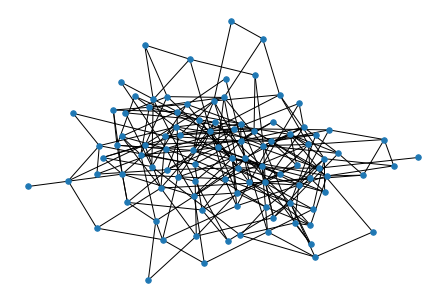

In [2]:
n = 100
p = 0.05

G = nx.gnp_random_graph(n,p)
nx.draw(G, node_size=30)

print("Clustering Coefficient: %f "%nx.average_clustering(G))
print("Average Degree: %f" %np.mean([G.degree(n) for n in G.nodes()]))

## ED 70 Moodplay

In [3]:
import pickle 
G = pickle.load( open( "ED_70_graph.p", "rb" ) )

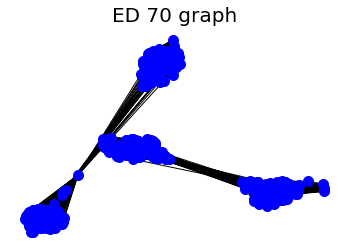

In [4]:
G = G.to_undirected()
no_nodes = len(G.nodes())
no_edges = len(G.edges())

plt.title("ED 70 graph",fontsize=20)
nx.draw(G,node_size=100,node_color='blue')
plt.show()

How does a random graph of the same size and (expected) number of edges compare?

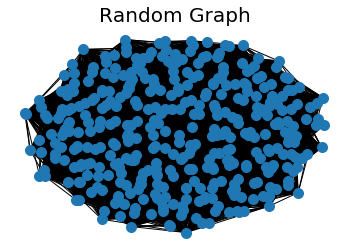

In [5]:
no_nodes = len(G.nodes())
no_edges = len(G.edges())

p = 2.0*no_edges/(no_nodes*no_nodes)

H = nx.gnp_random_graph(no_nodes,p)
H = H.to_undirected()
plt.title("Random Graph",fontsize=20)
nx.draw(H,node_size=100)
plt.show()

In [6]:
len(H.nodes())

389

# Degree-based statistics

Let's look at the degree distribution of the Moodplay Graph of ED70, compared with a random graph with the same number of nodes and edges.

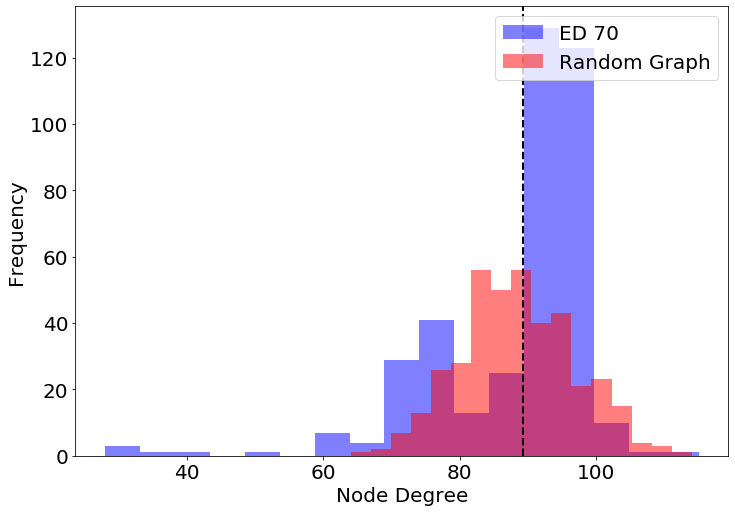

In [7]:
degrees_G = [d for n, d in G.degree()]
degrees_H = [d for n, d in H.degree()]

avg_deg = 2.0 * no_edges/no_nodes

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)

plt.xlabel('Node Degree',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(labelsize=20)

plt.axvline(x=avg_deg, linewidth=2, linestyle='--', color='black')

plt.hist(degrees_G,bins=17,label="ED 70",alpha=0.5,color='blue')
plt.hist(degrees_H,bins=17,label='Random Graph',alpha=0.5,color='red')
plt.legend(loc='upper right',fontsize=20)
plt.show()

The code below plots the CCDF of the degree distribution allowing us to inspect the tails of the degree distribution

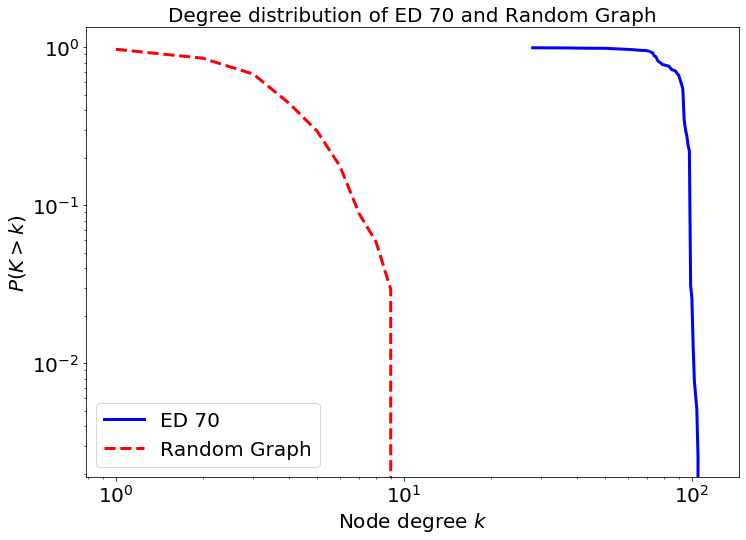

In [8]:
degree_sequence = sorted([d for n, d in G.degree()])  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cdf = np.array([c for c in cnt]).cumsum(0)
cdf = cdf/float(cdf[-1])
ccdf = 1-cdf

a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
plt.xlabel('Node degree $k$',fontsize=20)
plt.ylabel('$P(K>k)$',fontsize=20)
plt.tick_params(labelsize=20)

plt.xscale('log')
plt.yscale('log')
plt.plot(deg,ccdf,label = 'ED 70',linewidth=3,color='blue')

no_nodes = 34
no_edges = 78

H = nx.gnm_random_graph(34,78)
degree_sequence = sorted([d for n, d in H.degree()])  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())
cdf = np.array([c for c in cnt]).cumsum(0)
cdf = cdf/float(cdf[-1])
ccdf = 1-cdf
plt.plot(deg,ccdf,label = 'Random Graph',linewidth=3,linestyle='--',color='red')
plt.legend(loc='lower left',fontsize=20)
plt.title("Degree distribution of ED 70 and Random Graph",fontsize=20)

plt.show()

# Clustering coefficient

How does the node and average clustering coefficient compare between the real and random graph? The code below computes the clustering coefficients for each graph

In [9]:
clusters_G = list(nx.clustering(G).values())
avg_cluster_G = sum(clusters_G)/float(no_nodes)
clusters_H = list(nx.clustering(H).values())
avg_cluster_H = sum(clusters_H)/float(no_nodes)

As with node degre, we can look at the distribution of the clustering coefficients.

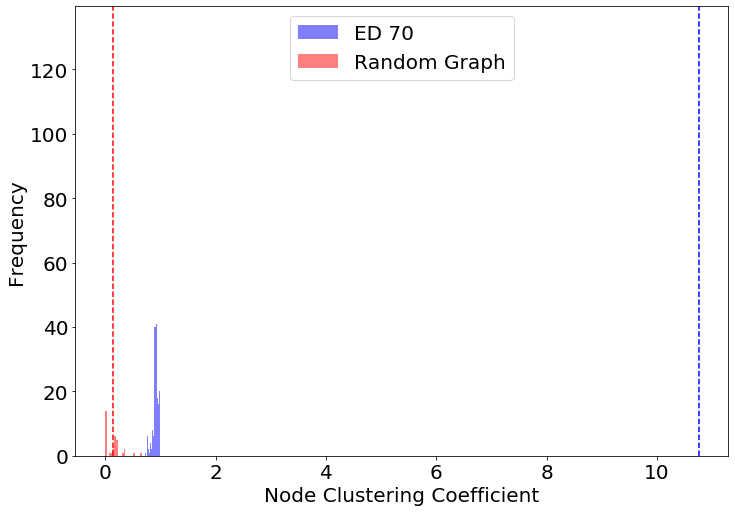

In [10]:
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

plt.xlabel('Node Clustering Coefficient',fontsize=20)
plt.ylabel('Frequency',fontsize=20)
plt.tick_params(labelsize=20)

plt.hist(clusters_G,bins=20,label="ED 70",alpha=0.5,color='blue')
plt.hist(clusters_H,bins=20,label='Random Graph',alpha=0.5,color='red')

plt.axvline(x=avg_cluster_G, linestyle='--', color='blue')
plt.axvline(x=avg_cluster_H, linestyle='--', color='red')

plt.legend(loc='upper center',fontsize=20)

plt.show()

# Path lengths and diameter

Finally, how do the lengths of paths between nodes compare? Below is some code for computing lenghts of paths between every pair of nodes in each graph.

In [13]:
def get_path_lengths(graph):
    listG = list(graph.nodes())
    lengths = []
    for i in range(len(list(G))):
        for j in range(i):
            try:
                lengths.append(len(nx.shortest_path(graph,listG[i],listG[j]))-1)
            except:
                pass                
    return lengths

path_lengths_G = get_path_lengths(G)
path_lengths_H = get_path_lengths(H)

In [14]:
avg_path_G = sum(path_lengths_G)/float(len(path_lengths_G))
avg_path_H = sum(path_lengths_H)/float(len(path_lengths_H))

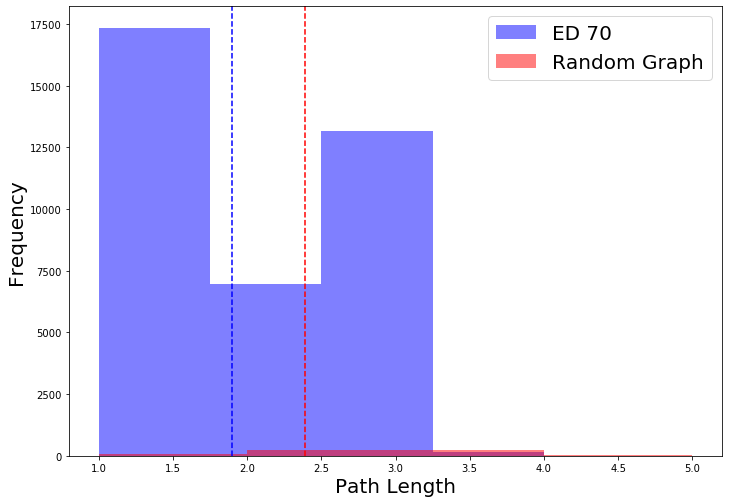

In [16]:
a4_dims = (11.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)

plt.xlabel('Path Length',fontsize=20)
plt.ylabel('Frequency',fontsize=20)

plt.hist(path_lengths_G,bins=4,label="ED 70",alpha=0.5,color='blue')
plt.hist(path_lengths_H,bins=4,label='Random Graph',alpha=0.5,color='red')

plt.axvline(x=avg_path_G, linestyle='--', color='blue')
plt.axvline(x=avg_path_H, linestyle='--', color='red')

plt.legend(loc='upper right',fontsize=20)

plt.show()